In [1]:
import cv2
import numpy as np

In [15]:
cv2.perspectiveTransform(np.array([[[100,200]]]), get_perspective_transform())


error: /home/blake/Downloads/opencv-2.4.13/modules/core/src/matmul.cpp:1943: error: (-215) scn + 1 == m.cols && (depth == CV_32F || depth == CV_64F) in function perspectiveTransform


In [3]:
def get_perspective_transform():        
    p1 = (232, 380) # top left
    p2 = (360, 380) # top right
    p3 = (206, 414) # bottom left
    p4 = (383, 414) # bottom right

    pts1 = np.float32([list(p1),list(p2),list(p3),list(p4)])
    output_width = 100
    output_height = 35
    dx=250
    dy=585
    pts2 = np.float32([[dx,dy],[dx+output_width,dy],[dx,dy+output_height],[dx+output_width,dy+output_height]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    return M

In [20]:
import cv2
import numpy as np

w, h = 512, 512
a = np.array(
    [[0, 0]], dtype=np.float32)
src = np.array(
    [[0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1]], dtype=np.float32)
dst = np.array(
    [[300, 350], [800, 300], [900, 923], [161, 923]], dtype=np.float32)

m = get_perspective_transform()
result = cv2.perspectiveTransform(a[None, :, :], m)
print result

[[[ 374.53042603  749.99157715]]]


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [144]:
def topdown(image_filename):
    img = cv2.imread(image_filename)
    img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)

    p1 = (232, 380) # top left
    p2 = (360, 380) # top right
    p3 = (206, 414) # bottom left
    p4 = (383, 414) # bottom right

    pts1 = np.float32([list(p1),list(p2),list(p3),list(p4)])
    output_width = 100
    output_height = 35
    dx=250
    dy=585
    pts2 = np.float32([[dx,dy],[dx+output_width,dy],[dx,dy+output_height],[dx+output_width,dy+output_height]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(640,640))
    return img, dst
    


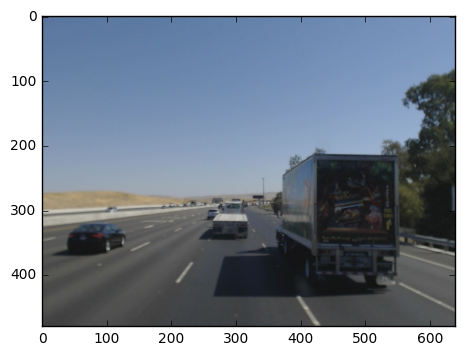

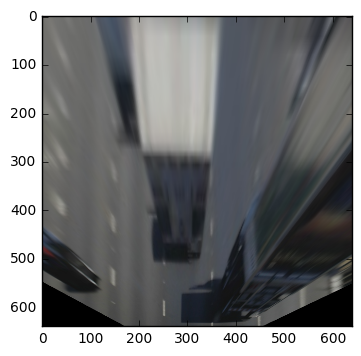

In [145]:
image_files = sorted(glob.glob('images/*.jpg'))
img, dst = topdown(image_files[0])
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(dst)

In [146]:
import glob
import os.path
save_folder = 'images_topdown'
image_files = sorted(glob.glob('images/*.jpg'))
for f in image_files:
    img, td = topdown(f)
    basename=os.path.basename(f)
    cv2.imwrite(save_folder +'/' + basename,td)
    

In [147]:
image_files = glob.glob('images/*.jpg')
sorted(image_files)

['images/frame0000.jpg',
 'images/frame0001.jpg',
 'images/frame0002.jpg',
 'images/frame0003.jpg',
 'images/frame0004.jpg',
 'images/frame0005.jpg',
 'images/frame0006.jpg',
 'images/frame0007.jpg',
 'images/frame0008.jpg',
 'images/frame0009.jpg',
 'images/frame0010.jpg',
 'images/frame0011.jpg',
 'images/frame0012.jpg',
 'images/frame0013.jpg',
 'images/frame0014.jpg',
 'images/frame0015.jpg',
 'images/frame0016.jpg',
 'images/frame0017.jpg',
 'images/frame0018.jpg',
 'images/frame0019.jpg',
 'images/frame0020.jpg',
 'images/frame0021.jpg',
 'images/frame0022.jpg',
 'images/frame0023.jpg',
 'images/frame0024.jpg',
 'images/frame0025.jpg',
 'images/frame0026.jpg',
 'images/frame0027.jpg',
 'images/frame0028.jpg',
 'images/frame0029.jpg',
 'images/frame0030.jpg',
 'images/frame0031.jpg',
 'images/frame0032.jpg',
 'images/frame0033.jpg',
 'images/frame0034.jpg',
 'images/frame0035.jpg',
 'images/frame0036.jpg',
 'images/frame0037.jpg',
 'images/frame0038.jpg',
 'images/frame0039.jpg',


In [79]:
ax1[0].imshow(img)
fig1.canvas.draw()

In [56]:
raw_input()

''

In [193]:
from Tkinter import *

master = Tk()


def create_new_lane():
    """
    creates a new lane composed of 3 points
    """



lines = {}

    
w = Canvas(master, width=500, height=500)
w.pack()

rect = w.create_rectangle([10,10,20,20])
line = w.create_line([[10,10],[20,20],[100,150]])
w.i

mainloop()

In [280]:
from Tkinter import *

master = Tk()


def create_new_lane():
    """
    creates a new lane composed of 3 points
    """



lines = {}

    
w = Canvas(master, width=500, height=500)
w.pack()
dogs=[10,10]

rect = w.create_rectangle(10,10,20,20)
def move_rect(event):
    print dogs
    print "clicked at", event.x, event.y
    w.coords(rect, event.x, event.y, event.x+20, event.y+20)
    dogs[0]=event.x
    dogs[1]=event.y
    print "new location" + str(dogs)
w.bind("<Button-1>", move_rect)

mainloop()

[10, 10]
clicked at 279 316
new location[279, 316]


In [358]:
import numpy as np
from scipy import interpolate


class Controller():
    """
    Class that contains all the lanes, UI buttons and controls the movement and drawing of the lanes
    """
    
class Lane():
    unselected_colors = ['#c80000','#00c800','#0000c8']
    selected_colors =  ['#ff0000','#00ff00','#0000ff']
    initial_points = [[100,100], [200,200], [200,300]]
    unselected_anchor_size = 10
    selected_anchor_size = 15
    num_bezier_points = 10
    line_color = '#3d3d3d'
    line_width = 3
    deactivated_color = '#8a8a8a'    
    
    def __init__(self, canvas, activated):
        """
        initialize the lane
        """
        self.anchor_points = self.initial_points
        self.line_id = None
        self.anchor_ids = []
        self.canvas = None

        self.selected_index = None
        self.activated = True

        self.canvas = canvas
        self.activated = activated
        line_fill = self.get_line_fill()
        bezier_points = self.compute_bezier_points(self.num_bezier_points)
        print bezier_points
        self.line_id = self.canvas.create_line(bezier_points, fill=line_fill, smooth=True, width=self.line_width, splinesteps=2)
        print self.canvas.coords(self.line_id)
        for index in range(len(self.anchor_points)):
            anchor_fill = self.get_anchor_fill(index)
            anchor_point = self.anchor_points[index]
            anchor_coordinates = self.square_centered_at_point(anchor_point, self.unselected_anchor_size)
            anchor_id = self.canvas.create_rectangle(anchor_coordinates, fill=anchor_fill)
            self.anchor_ids.append(anchor_id)      
    
    def compute_bezier_points(self, n):
        """
        returns n bezier points that fir a curve from the anchor points.
        These points can be used to draw a line
        """
        x = [p[0] for p in self.anchor_points]
        y = [p[1] for p in self.anchor_points]
        tck,u = interpolate.splprep( [x,y], k = 2)
        xnew,ynew = interpolate.splev( np.linspace( 0, 1, n ), tck,der = 0)
        return [c for p in zip(xnew, ynew) for c in p]

    def update_lane_color(self):
        """
        Updates the components of the lane with the appropriate color.
        """
        line_fill = self.get_line_fill()
        self.line_id = self.canvas.create_line(self.anchor_points, fill=line_fill)
        for index in range(len(anchor_points)):
            anchor_fill = self.get_anchor_fill(index)            
            anchor_id = self.anchor_ids[index]
            self.canvas.itemconfig(anchor_id, fill=fill)
            
    def activate(self):
        """
        activates the line, by painting it appropriately
        """
        self.activated = True
        self.update_lane_color()
            
    def deactivate(self):
        """
        deactivates the line, by painting it appropriately
        """
        self.activated = False
        self.update_lane_color()
        
        
    def update_spline(self):
        """
        Updates the spline based on the anchor point locations
        """
        bezier_points = self.compute_bezier_points(self.num_bezier_points)
        
        self.canvas.coords(self.line_id, *bezier_points)
        
    def move_anchor(self, index, anchor_point):
        """
        Moves the anchor to the selected location.  Updates the anchor and spline appropriately.
        """
        self.anchor_points[index] = anchor_point
        anchor_id = self.anchor_ids[index]
        # size of the anchor is based on whether it is selected
        size = self.selected_anchor_size if self.selected_index == index else self.unselected_anchor_size
        # generate coordinates of anchor rectangle based on anchor point and size
        anchor_coordinates = self.square_centered_at_point(anchor_point, size)
        # move the anchor
        self.canvas.coords(anchor_id, *anchor_coordinates)
        # move the spline with the new anchor location
        self.update_spline()
        
    
    def square_centered_at_point(self, point, size):
        """
        given a point, creates a square if size centered around point.
        
        point is an array of size 2 looking like [row, col]
        """
        return [point[0] - (size/2),point[1] - (size/2),point[0] + (size/2),point[1] + (size/2)]
    
    def update_anchor(self, anchor_id, anchor_point, fill, size):
        """
        Updates an anchor's size and fill color
        """
        self.canvas.itemconfig(anchor_id, fill=fill)
        anchor_coordinates = self.square_centered_at_point(anchor_point, size)
        self.canvas.coords(anchor_id, *anchor_coordinates)
        
    def get_anchor_fill(self, index):
        if not self.activated:
            return self.deactivated_color
        
        fill = self.selected_colors[index] if self.selected_index == index else self.unselected_colors[index]
        return fill
    
    def get_line_fill(self):
        return self.line_color if self.activated else self.deactivated_color
    
    def deselect_anchor(self, index):
        """
        Deselects the anchor at index.  Results in a smaller anchor and darker color.
        """
        anchor_point = anchor_points[index]
        anchor_id = anchor_ids[index]
        fill = self.get_anchor_fill(index)
        self.update_anchor(anchor_id, anchor_point, fill, self.unselected_anchor_size)
        self.selected_index = None
        
    def select_anchor(self, index):
        """
        Visually updates the selected anchor to be brighter and bigger.  Deselects any previously selected anchor.
        """
        if self.selected_index:
            deselect(self.selected_index)
        self.selected_index = index
        anchor_point = self.anchor_points[index]
        anchor_id = self.anchor_ids[index]
        fill = self.get_anchor_fill(index)
        self.update_anchor(anchor_id, anchor_point, fill, self.selected_anchor_size)
       
        
        
    

def create_lane():
    """
    creates a lane segment composed of 3 rectangle anchors connecting 2 splines.
    bottom color is red.
    top color i
    """


In [390]:
from Tkinter import *

master = Tk()
    
canvas = Canvas(master, width=500, height=500)
lane = Lane(canvas, True)
lane.select_anchor(1)
is_shift_pressed = True
def move_selected_anchor(event):
    #lane.move_anchor(lane.selected_index, [event.x, event.y])
    print "j"
    #e=event
    
#canvas.bind('<Motion>', move_selected_anchor)
master.bind('<Key>', move_selected_anchor)
canvas.pack()

print lane.anchor_points


mainloop()

[100.0, 100.00000000000003, 58.134046310957267, 45.667171708085398, 29.512358821953015, 10.473106044704974, 14.134937532987209, -5.5821969901412345, 12.001782444059863, -2.4987373964532154, 23.112893555170984, 19.72348482576902, 47.468270866320537, 61.084469676525401, 85.067914377508529, 121.58421715581599, 135.91182408873505, 201.22272726364088, 200.0, 300.0]
[100.0, 100.00000000000003, 58.13404631095727, 45.6671717080854, 29.512358821953015, 10.473106044704974, 14.134937532987209, -5.5821969901412345, 12.001782444059863, -2.4987373964532154, 23.112893555170984, 19.72348482576902, 47.46827086632054, 61.0844696765254, 85.06791437750853, 121.58421715581599, 135.91182408873505, 201.22272726364088, 200.0, 300.0]
[[100, 100], [22, 2], [200, 300]]


In [388]:
from Tkinter import *

main = Tk()

def leftKey(event):
    print "Left key pressed"

def rightKey(event):
    print "Right key pressed"

frame = Frame(main, width=100, height=100)
main.bind('<Left>', leftKey)
main.bind('<Right>', rightKey)
frame.pack()
main.mainloop()

In [ ]:
# Open Window
# button(new lane): creates a new lane and as this lane be the current lane (each lane has a unique id)
# drop down (select lane): selects lane from set of lanes.  This lane will be editable, other lanes will be drawn but not editable.
# button(stop lane): stops this lane from being recorded further, as it is no longer in existance
# p = play
# s = stop

# f = pops open input to go to frame X
# DropDown (point) selects 1 of 3 points to edit
# clicking and arrow keys will move this point

# Usage
# user will select the 3 points in the beggininng.  defaults to straight line in the screen.
# then they will press play and focus on modifying the location of a single anchor throughout the video.
# they then repeat for other draw points. of the line
# then repeat for next lane

In [308]:
%debug

> /usr/lib/python2.7/lib-tk/Tkinter.py(2262)coords()
   2260         return map(getdouble,
   2261                            self.tk.splitlist(
-> 2262                    self.tk.call((self._w, 'coords') + args)))
   2263     def _create(self, itemType, args, kw): # Args: (val, val, ..., cnf={})
   2264         """Internal function."""

ipdb> u
> <ipython-input-306-9b738f2eaf28>(86)update_spline()
     84         """
     85         bezier_points = self.compute_bezier_points(self.num_bezier_points)
---> 86         self.canvas.coords(self.line_id, *bezier_points)
     87 
     88     def move_anchor(self, index, anchor_point):

ipdb> u
array([ 0.        ,  0.41421356,  1.        ])
ipdb> bezier_points
[[99.999999999999986, 99.999999999999986], [124.11089151621567, 202.33047859969275], [144.97183793115519, 284.63389310501788], [162.58283924481864, 346.91024351597542], [176.94389545720588, 389.15952983256523], [188.055006568317, 411.38175205478746], [195.91617257815199, 413.5769101826420

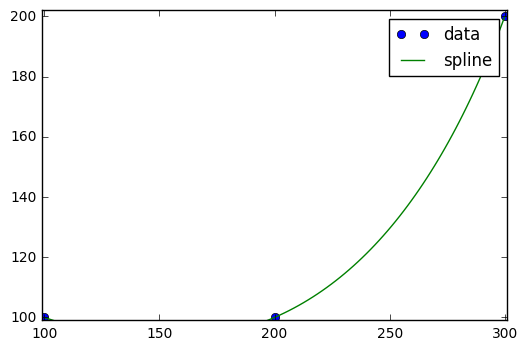

In [256]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


nodes = np.array( [ [100, 100], [200, 100], [300, 200] ] )

x = nodes[:,0]
y = nodes[:,1]

tck,u = interpolate.splprep( [x,y], k = 2)
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)

plt.plot( x,y,'o' , xnew ,ynew )
plt.legend( [ 'data' , 'spline'] )
plt.axis( [ x.min() - 1 , x.max() + 1 , y.min() - 1 , y.max() + 2 ] )
plt.show()

In [254]:
xnew

array([ 100.        ,  102.72723665,  105.44004403,  108.13842213,
        110.82237095,  113.49189049,  116.14698076,  118.78764174,
        121.41387345,  124.02567588,  126.62304903,  129.2059929 ,
        131.77450749,  134.32859281,  136.86824885,  139.39347561,
        141.90427309,  144.40064129,  146.88258022,  149.35008986,
        151.80317023,  154.24182132,  156.66604313,  159.07583566,
        161.47119892,  163.8521329 ,  166.2186376 ,  168.57071302,
        170.90835916,  173.23157602,  175.54036361,  177.83472191,
        180.11465094,  182.38015069,  184.63122117,  186.86786236,
        189.09007428,  191.29785691,  193.49121027,  195.67013435,
        197.83462916,  199.98469468,  202.12033093,  204.2415379 ,
        206.34831558,  208.440664  ,  210.51858313,  212.58207298,
        214.63113356,  216.66576486,  218.68596688,  220.69173962,
        222.68308309,  224.65999727,  226.62248218,  228.57053781,
        230.50416416,  232.42336123,  234.32812902,  236.21846

In [255]:
xy

NameError: name 'xy' is not defined

In [401]:
import numpy as np
from scipy import interpolate
from PIL import ImageTk, Image
import Tkinter as tk
import glob


In [397]:
Image

<class Tkinter.Image at 0x7f588ce93ce8>

In [396]:
PIL.Image.open()

TypeError: open() takes at least 1 argument (0 given)

In [405]:
a=PIL.Image.open(images[0])

In [399]:
images=glob.glob('images_topdown/*.jpg')

In [407]:
a.size

(640, 640)

In [21]:
def get_inverse_perspective_transform(): 
    p1 = (232, 380) # top left
    p2 = (360, 380) # top right
    p3 = (206, 414) # bottom left
    p4 = (383, 414) # bottom right

    pts1 = np.float32([list(p1),list(p2),list(p3),list(p4)])
    output_width = 100
    output_height = 35
    dx=250
    dy=585
    pts2 = np.float32([[dx,dy],[dx+output_width,dy],[dx,dy+output_height],[dx+output_width,dy+output_height]])
    M = cv2.getPerspectiveTransform(pts2,pts1)
    return M

In [31]:
Mp=get_inverse_perspective_transform()

In [32]:
M=get_perspective_transform()

In [33]:
Mpp= np.linalg.inv(Mp)

In [34]:
M

array([[ -2.38295486e-01,  -1.04079058e+00,   3.74530418e+02],
       [ -1.70974346e-14,  -2.44322960e+00,   7.49991590e+02],
       [ -3.12250226e-17,  -3.43425848e-03,   1.00000000e+00]])

In [35]:
Mpp

array([[  4.39618644e+00,   1.92009908e+01,  -6.90951209e+03],
       [  1.20878686e-12,   4.50738410e+01,  -1.38361952e+04],
       [  2.00605126e-15,   6.33568046e-02,  -1.84484671e+01]])

In [36]:
Mp

array([[  2.27469880e-01,  -4.21572002e-01,   2.30981067e+02],
       [ -2.75335310e-14,  -4.09294320e-01,   3.06967298e+02],
       [ -6.98226199e-17,  -1.40562249e-03,   1.00000000e+00]])

In [37]:
M==Mp

array([[False, False, False],
       [False, False, False],
       [False, False,  True]], dtype=bool)

In [38]:
canvas

NameError: name 'canvas' is not defined

In [39]:
from Tkinter import *

master = Tk()
    
canvas = Canvas(master, width=500, height=500)

In [50]:
a=[1,2,3]
a[0:2]

[1, 2]

In [52]:
range(0,10,2)

[0, 2, 4, 6, 8]

In [53]:
import random

In [87]:
class Foo(object):
    a=Foo.ab()
    def __init__(self):
        self.f=1
    
    def pr(self):
        print self.f
    @staticmethod
    def ab():
        return 3

def poo(f):
    f()
    
foo = Foo()
foo2 = Foo()
foo2.a=4
poo(foo.pr)
Foo.ab()

1


3

In [86]:
print Foo.a

3


In [88]:
[] is not None

True

In [89]:
a=['','sada']

In [90]:
if a:
    print 'hi'

hi
